In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import models
from keras.models import load_model
print(tf.__version__)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, recall_score, classification_report

import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

2.4.1


(568630, 30)
(568630, 1)
MultiIndex([(  'Time',),
            (    'V1',),
            (    'V2',),
            (    'V3',),
            (    'V4',),
            (    'V5',),
            (    'V6',),
            (    'V7',),
            (    'V8',),
            (    'V9',),
            (   'V10',),
            (   'V11',),
            (   'V12',),
            (   'V13',),
            (   'V14',),
            (   'V15',),
            (   'V16',),
            (   'V17',),
            (   'V18',),
            (   'V19',),
            (   'V20',),
            (   'V21',),
            (   'V22',),
            (   'V23',),
            (   'V24',),
            (   'V25',),
            (   'V26',),
            (   'V27',),
            (   'V28',),
            ('Amount',)],
           )


<ipython-input-8-b1110a9ac199>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelxgb.fit(X_train_orig, Y_train_orig)


[0.0129897  0.01492117 0.01253543 0.0167045  0.02767713 0.01327776
 0.01585037 0.0212676  0.01092651 0.03796466 0.07739854 0.06708272
 0.13041365 0.01001632 0.11199648 0.01226063 0.06029858 0.17392598
 0.03924475 0.0131662  0.01302409 0.01840687 0.01026456 0.00677262
 0.00947962 0.00767267 0.01878951 0.01381948 0.00991075 0.01194116]


<ipython-input-8-b1110a9ac199>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etcmodel.fit(X_train_orig,Y_train_orig)


[0.01567454 0.01267102 0.0128228  0.02949907 0.03647184 0.01506821
 0.0132615  0.02321116 0.01456852 0.03104078 0.07486311 0.0811314
 0.11305062 0.01225137 0.11676547 0.01316096 0.06076759 0.13694559
 0.04833811 0.01459506 0.01247332 0.0172842  0.0123613  0.00940912
 0.01244944 0.00953388 0.01475185 0.01187679 0.01157734 0.01212402]
  X_train_orig   value_x   value_y
0          V17  0.173926  0.136946
1          V12  0.130414  0.113051
2          V14  0.111996  0.116765
3          V10  0.077399  0.074863
4          V11  0.067083  0.081131
5          V16  0.060299  0.060768
6          V18  0.039245  0.048338
7           V9  0.037965  0.031041
8           V4  0.027677  0.036472
9           V7  0.021268  0.023211
(284807, 30)


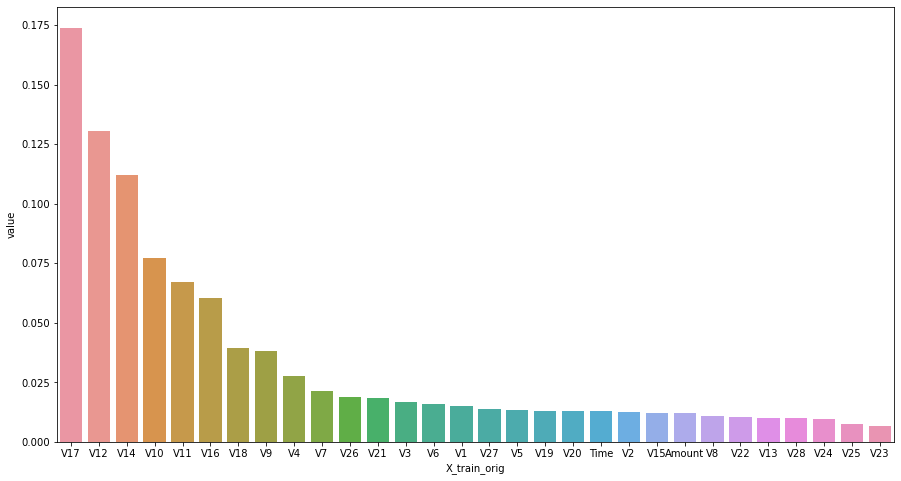

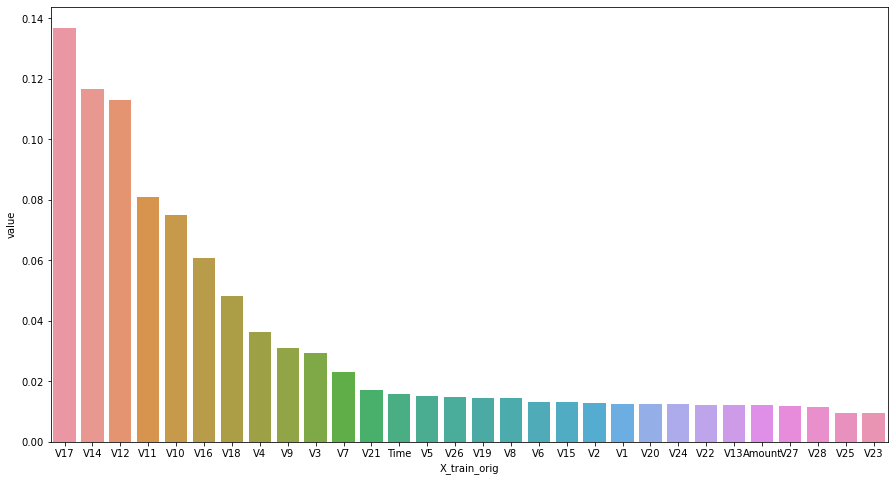

In [8]:
#loads up kaggle dataset
data = pd.read_csv('creditcard.csv')
data.head()

X_train_orig= data.drop('Class',1)

Y_train_orig = data['Class']
Y_train_orig = pd.DataFrame(Y_train_orig, columns=['Class'])
#applies smote to this class
smote= SMOTE()
X_train_orig_sm, Y_train_orig_sm= smote.fit_resample(X_train_orig,Y_train_orig)
X_train_orig_sm= pd.DataFrame(X_train_orig_sm, columns=X_train_orig.columns)

scaler = StandardScaler()
X_train_orig_sm = scaler.fit_transform(X_train_orig_sm)
X_train_orig_sm = pd.DataFrame(X_train_orig_sm, columns=[X_train_orig.columns])

#X_train_orig.shape, X_test_orig.shape
print(X_train_orig_sm.shape)
print(Y_train_orig_sm.shape)
print(X_train_orig_sm.columns)

###############Feature selection through RandomForest classifier###############
modelxgb = RandomForestClassifier()
modelxgb.fit(X_train_orig, Y_train_orig)
print(modelxgb.feature_importances_)
f_xgb = pd.DataFrame(data={'X_train_orig':X_train_orig.columns,'value':modelxgb.feature_importances_})
f_xgb = f_xgb.sort_values(['value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_xgb['X_train_orig'],f_xgb['value'])

################Feature selection through ExtraTrees classifier###############
etcmodel = ExtraTreesClassifier()
etcmodel.fit(X_train_orig,Y_train_orig)
print(etcmodel.feature_importances_)
f_etc = pd.DataFrame(data={'X_train_orig':X_train_orig.columns,'value':etcmodel.feature_importances_})
f_etc = f_etc.sort_values(['value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_etc['X_train_orig'],f_etc['value'])

###############Select top 10 features through aggregation from the two feature selection classifier###############
ft = pd.merge(f_xgb, f_etc,how='inner', on=["X_train_orig"])
ft.sort_values(["value_x","value_y"],ascending=False, inplace=True)
top10ft = ft.head(10)
print(top10ft)

###############Filter the dataset with the 22 features selected###############
X_train_orig_sm=X_train_orig_sm[top10ft.X_train_orig]
print(X_train_orig.shape)


In [9]:
fcn_model = tf.keras.models.Sequential()
fcn_model.add(tf.keras.layers.Dense(100, input_shape=(10,) ))
fcn_model.add(tf.keras.layers.Activation('relu'))
fcn_model.add(tf.keras.layers.Dropout(0.2))
fcn_model.add(tf.keras.layers.Dense(10))
fcn_model.add(tf.keras.layers.Activation('relu'))
fcn_model.add(tf.keras.layers.Dropout(0.2))
fcn_model.add(tf.keras.layers.Dense(1))
fcn_model.add(tf.keras.layers.Activation('sigmoid'))

fcn_model.summary()
# need sparse otherwise shape is wrong. check why
fcn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 20
epochs = 10
history = fcn_model.fit(X_train_orig_sm, Y_train_orig_sm, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

# creates a H5PY file 'my_model.h5'
fcn_model.save('fcn_model.h5') # save the entire model with trained weights


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [11]:
X_train_orig_sm_cnn = X_train_orig_sm.values.reshape(X_train_orig_sm.shape[0], X_train_orig_sm.shape[1], 1)

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters = 32, kernel_size=2, activation='relu', input_shape=(X_train_orig_sm_cnn[0].shape)))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv1D(filters = 32, kernel_size=2, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(units=1, activation='sigmoid'))

cnn_model.summary()
batch_size = 20
epochs = 10
cnn_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train_orig_sm_cnn, Y_train_orig_sm, batch_size=batch_size, epochs=1, verbose=1, validation_split=0.2)

cnn_model.save('cnn_model.h5') # save the entire model with trained weights

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 9, 32)             96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 32)             128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 32)             2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 32)             128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              